# Naive Bayes Classification of Phishing Websites

Notebook adapted from the 05.05 Naive Bayes notebook from the Python Data Science Handbook.  
The following website was also used in making this notebook: [BAIT 509](https://bait509-ubc.github.io/BAIT509/lectures/lecture6.html)   
Modified by: Gábor Major  
Last Modified date: 2025-02-01

Import libraries.

In [58]:
from scipy.io import arff
import pandas as pd

## Import Data
Load in the data, as the arff file.

In [59]:
data = arff.loadarff('../phishing_websites_data/Training Dataset.arff')
df = pd.DataFrame(data[0])
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'-1'
1,b'1',b'1',b'1',b'1',b'1',b'-1',b'0',b'1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'-1'
2,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'-1',b'1',b'-1',b'1',b'0',b'-1',b'-1'
3,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',b'-1',b'1',b'-1'
4,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'-1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'1'


Clean up data by changing the encoding to remove the 'b', and add 1 to each value as negative values are not allowed in the model.

In [60]:
df = df.select_dtypes([object])
df = df.stack().str.decode('utf-8').unstack()
df = df.apply(pd.to_numeric)
df = df.add(1)
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,0,2,2,2,0,0,0,0,0,2,...,2,2,0,0,0,0,2,2,0,0
1,2,2,2,2,2,0,1,2,0,2,...,2,2,0,0,1,0,2,2,2,0
2,2,1,2,2,2,0,0,0,0,2,...,2,2,2,0,2,0,2,1,0,0
3,2,1,2,2,2,0,0,0,2,2,...,2,2,0,0,2,0,2,0,2,0
4,2,1,0,2,2,0,2,2,0,2,...,0,2,0,0,1,0,2,2,2,2


## Create Data Sets
Split data into 60% training, 20% validation, and 20% testing sets.

In [61]:
data_target = df['Result']
data_features = df.drop(columns=['Result'])

In [62]:
from sklearn.model_selection import train_test_split
# Split off 20% test set
xTrain, xTest, yTrain, yTest = train_test_split(data_features, data_target, test_size=0.2)
# Split 80% of full data into 60% and 20% sets
xTrain, xValidation, yTrain, yValidation = train_test_split(xTrain, yTrain, test_size=0.25)

## Create Model
Use all the Bernoulli Naive Bayes model as this model performs the best on binary data, and it also takes into account not just the presence of data byt also the absence.

In [63]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()

Train the model on the data.

In [64]:
model.fit(xTrain.values, yTrain)

BernoulliNB()

Make predictions for validation set.

In [67]:
yPrediction = model.predict(xValidation.values)

Show results of the classification for validation set.

In [68]:
from sklearn import metrics
print(metrics.classification_report(yPrediction, yValidation))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       924
           2       0.95      0.91      0.93      1287

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



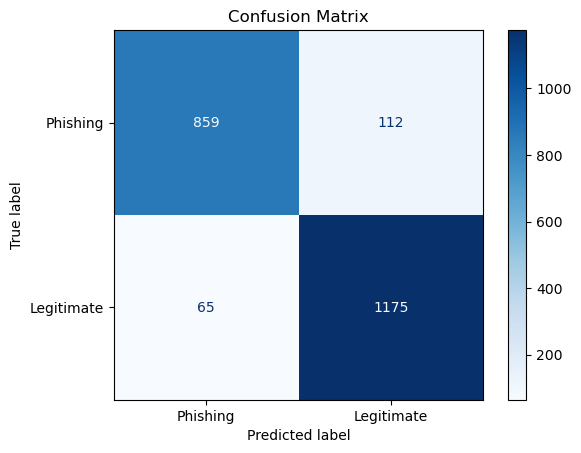

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
target_names = ['Phishing', 'Legitimate']

matrix = confusion_matrix(yValidation, yPrediction)
display_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=target_names)
display_matrix.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()

Hyperparameter tuning using GridSearchCV.

In [70]:
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": [0.1, 1.0, 10, 100]}
grid_search = GridSearchCV(BernoulliNB(), param_grid, verbose=2)
grid_search.fit(xTrain.values, yTrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ........................................

GridSearchCV(estimator=BernoulliNB(), param_grid={'alpha': [0.1, 1.0, 10, 100]},
             verbose=2)

Show the results of the hyperparameter tuning.

{'alpha': 0.1}
0.9106000106842342
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       924
           2       0.95      0.91      0.93      1287

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



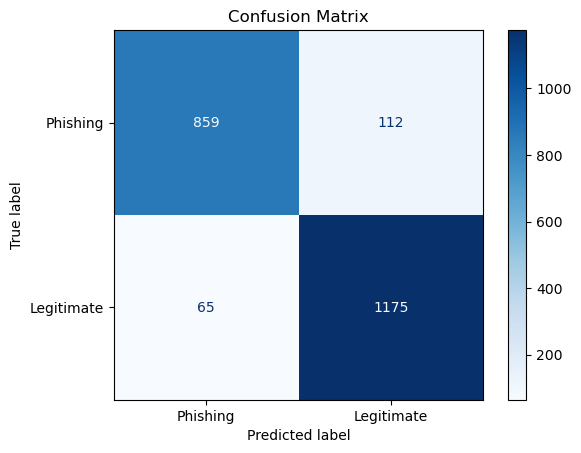

In [72]:
print(grid_search.best_params_)
print(grid_search.best_score_)

yPrediction = grid_search.predict(xValidation.values)
print(metrics.classification_report(yPrediction, yValidation))
matrix = confusion_matrix(yValidation, yPrediction)
display_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=target_names)
display_matrix.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()

Finally testing using the Test set.

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       953
           2       0.94      0.89      0.91      1258

    accuracy                           0.90      2211
   macro avg       0.90      0.91      0.90      2211
weighted avg       0.91      0.90      0.90      2211



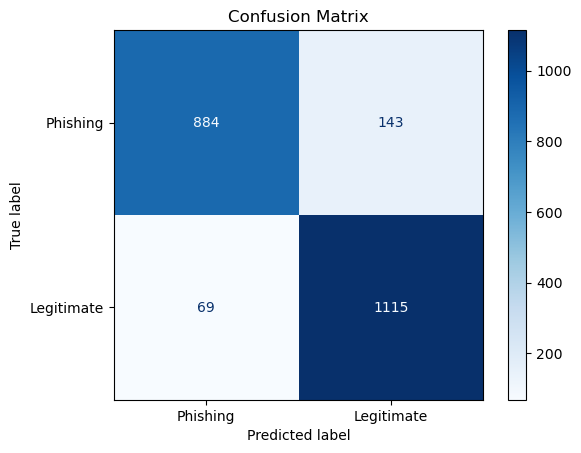

In [73]:
yPrediction = grid_search.predict(xTest.values)
print(metrics.classification_report(yPrediction, yTest))
matrix = confusion_matrix(yTest, yPrediction)
display_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=target_names)
display_matrix.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()

## Save Model

In [74]:
import pickle
with open(f'models/bernoulli_nb.pkl', 'wb') as f:
    pickle.dump(grid_search, f)

## Use Model
Import the model and use it.

In [75]:
with open(f'models/bernoulli_nb.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [76]:
def take_input_and_convert_for_model(question):
    while(True):
        answer = input(question + ": ").upper()
        if answer == "Y":
            return 0
        elif answer == "N":
            return 2
        elif answer == "M":
            return 1
        print("Could not get answer, try again.")

In [ ]:
print("Answer the following questions with Y for yes, N for no, an for some questions M for the middle answer.")
data_list = [
    take_input_and_convert_for_model(x) for x in [                
        "Does the URL have an IPv4 or IPv6 address? Example: http://125.98.3.123/fake.html (Y, N)",
        "Is the URL shorter than 54 characters, in between 54 and 75 or longer? (Y, M, N)",
        "Is it a shortened URL? Example: bit.ly/19DXSk4 (Y, N)",
        "Does the URL have the @ symbol? (Y, N)",
        "Is a double foreward slash // present in the URL? Example: http://www.legitimate.com//http://www.phishing.com (Y, N)",
        "Is there a dash - in the URL? Example: http://www.Confirme-paypal.com/ (Y, N)",
        "Excluding the www. are there 1 dots, 2 dots, or more in the URL? (Y, M, N)",
        "Is the website using https and the issuer is trusted and the certificate is over 1 year old, or is it using https but issuer is not trusted, or not using https? (Y, M, N)",
        "Does the domain expire is less that a year? (Y, N)",
        "Is the favicon loaded from a different domain? (Y, N)",
        "Are common ports in their preffered states? \n21 closed, \n22 closed, \n23 closed, \n80 open, \n443 open, \n445 closed, \n1433 closed, \n1521 closed, \n3306 closed, \n3389 closed \n(Y, N)",
        "Does https show up in the URL? Example: http://https-www-paypal-it-webapps-mpp-home.soft-hair.com/ (Y, N)",
        "What percentage of resources are loaded from another URL, less than 22, between 22 and 61 or more than 61? (Y, M, N)",
        "What percentage of <a> tags are pointing to another URL, less than 22, between 22 and 61 or more than 61? (Y, M, N)",
        "What percentage of links in <meta>, <script> and <link> tags are pointing to another URL, less than 22, between 22 and 61 or more than 61? (Y, M, N)",
        "Is the Server Form Handler about:blank or empty, or it refers to a different domain, or something else? (Y, M, N)",
        "Is mail() or mailto present on the page? (Y, N)",
        "Is the identity in WHOIS database part of the URL? (Y, N)",
        "Number of times redirected? Less than 1, between 2 and 4 or more? (Y, M, N)",
        "Does onMouseOver change the URL? (Y, N)",
        "Is right click disabled? (Y, N)",
        "Is a popup window used? (Y, N)",
        "Do iframes use frameBorder? (Y, N)",
        "In WHOIS database is the age of the domain over 6 months? (Y, N)",
        "Is there no DNS record for the domain? (Y, N)",
        "What website rank is it in the Alexa database? Less than 100,000, more than 100,000, or not found? (Y, M, N)",
        "Is the PageRank of the website less than 0.2? (Y, N)",
        "Is the website indexed by Google? (Y, N)",
        "What is the number of links pointing to this website? 0, between 0 and 2, or more? (Y, M, N)",
        "Is the IP or domain in the PHishTank or StopBadware top 50 list? (Y, N)"
    ]
]

Answer the following questions with Y for yes, N for no, an for some questions M for the middle answer.


In [81]:
import numpy as np
prediction = loaded_model.predict(np.array(data_list).reshape(1, -1))
if prediction == 0:
    print("Website prediction is phishing!")
elif prediction == 2:
    print("Website prediction is legitimate!")

Website prediction is legitimate!
